In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
adv=pd.read_csv("Advertising.csv")
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
adv.shape

(200, 5)

In [4]:
del adv["Unnamed: 0"]
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
adv.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
adv.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [9]:
adv.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


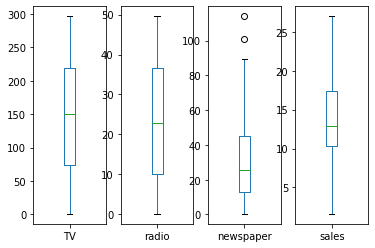

In [10]:
adv.plot(kind="box", subplots=True);

In [11]:
Q1,Q3=adv["newspaper"].quantile([0.25,0.75])
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

adv["newspaper"]=np.where(adv["newspaper"]>UL, UL, adv["newspaper"])

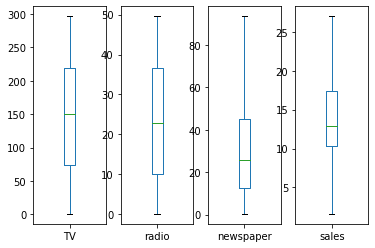

In [12]:
adv.plot(kind="box", subplots=True);

In [13]:
adv.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [14]:
X=adv.iloc[:, 0:-1]
y=adv.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=7)

In [16]:
X_train.shape, X_test.shape

((140, 3), (60, 3))

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.coef_.round(3)

array([0.047, 0.191, 0.   ])

In [18]:
lr.intercept_

2.5952734488893547

In [19]:
p_train=lr.predict(X_train)
p_test=lr.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
RMSE_Train=mean_squared_error(y_train, p_train, squared=False)
RMSE_Test=mean_squared_error(y_test, p_test, squared=False)

In [22]:
RMSE_Train/y_train.mean()

0.1168052798195406

In [23]:
RMSE_Test/y_test.mean()

0.1261088587428954

In [24]:
r2_train=r2_score(y_train, p_train)
r2_test=r2_score(y_test, p_test)

In [25]:
r2_train, r2_test

(0.8970471401529987, 0.8894451267086719)

In [26]:
adv.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [27]:
from statsmodels.formula.api import ols

In [28]:
formula='sales~TV+radio+newspaper'

In [29]:
train_df=pd.concat([X_train, y_train], axis=1)
test_df=pd.concat([X_test, y_test], axis=1)

In [30]:
model=ols(formula, data=train_df).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     395.0
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           6.42e-67
Time:                        14:30:11   Log-Likelihood:                -271.78
No. Observations:                 140   AIC:                             551.6
Df Residuals:                     136   BIC:                             563.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5953      0.398      6.519      0.000       1.808       3.383
TV             0.0471      0.002     27.659      0.000       0.044       0.050
radio          0.1909      0.010     18.860      0.000       0.171       0.211
newspaper   8.559e-05      0.007      0.012      0.991      -0.014       0.015
==============================================================================
Omnibus:                       49.751   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.655
Skew:                          -1.399   Prob(JB):                     3.49e-30
Kurtosis:                       6.928   Cond. No.                         488.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Pickling of model
import pickle
pickle.dump(lr, open("reg_adv_model.pkl", 'wb'))

In [40]:
pickled_model=pickle.load(open("reg_adv_model.pkl", 'rb'))
pickled_model.predict(adv.drop('sales',axis=1))

array([20.66209421, 12.20005448, 12.17580625, 17.62544308, 13.18258642,
       12.34854627, 11.56973277, 12.00306511,  3.40160303, 12.50908442,
        6.81974177, 17.295846  , 10.4244096 ,  8.64169734, 18.49926469,
       20.91575047, 12.78668577, 23.42214369,  9.77211216, 14.10182547,
       18.18090689, 14.75852295,  6.25748136, 16.58298537,  7.9385403 ,
       15.65436512, 14.92498454, 17.10058931, 19.49633094,  8.98079198,
       21.80540269, 11.24130068,  7.46478974, 18.93043553,  7.3730742 ,
       17.07805899, 23.53642387, 15.55175171,  9.72740527, 20.54085409,
       16.39868984, 17.3170237 , 21.72028386, 13.9515566 ,  8.68892071,
       15.14564624,  8.7157197 , 21.82604936, 16.32314472,  7.98505417,
       12.60570033,  9.1599274 , 20.75860747, 20.02664106, 20.47536264,
       21.40588992,  8.30818575, 12.68111649, 22.00295529, 18.15795881,
        5.50016392, 23.06674649, 16.83414041, 13.08748493, 16.94796829,
        7.62269263,  8.77697057, 11.92924748, 19.03446357, 21.19